# Set up

dropped columns:

-income - too many missing values

-ethnicity - to complicated

-last_online - useless information
 
-location - nearly everyone is in San Fransico

In [61]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv('profiles.csv')

df.drop('income', axis=1, inplace=True)
df.drop('ethnicity', axis=1, inplace=True)
df.drop('last_online', axis=1, inplace=True)
df.drop('location', axis=1, inplace=True)
df.drop('sign', axis=1, inplace=True)
df.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,height,job,offspring,orientation,pets,religion,sex,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,75.0,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,70.0,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,68.0,NaN,NaN,straight,has cats,NaN,m,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,71.0,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,66.0,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,no,english,single


# Cleaning the data

the data is split in to two dataframes:

df - replaces missing values with best guesses - leaves 22446 rows

perfect_df - drop essays - drop all rows with missing values - leaves 8020 rows

In [62]:
df.replace('&rsquo;', "'", regex=True, inplace=True)

essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
perfect_df = df.drop(columns = essay_columns)
perfect_df = perfect_df.dropna()

print(perfect_df.info())

df['diet'].fillna('anything', inplace=True)
df['drugs'].fillna('never', inplace=True)
df['offspring'].fillna('none', inplace=True)
df['religion'].fillna('athiesm', inplace=True)
df['pets'].fillna('none', inplace=True)

df = df.dropna()

print(df.info())

print(perfect_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 8020 entries, 0 to 59944
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          8020 non-null   int64  
 1   body_type    8020 non-null   object 
 2   diet         8020 non-null   object 
 3   drinks       8020 non-null   object 
 4   drugs        8020 non-null   object 
 5   education    8020 non-null   object 
 6   height       8020 non-null   float64
 7   job          8020 non-null   object 
 8   offspring    8020 non-null   object 
 9   orientation  8020 non-null   object 
 10  pets         8020 non-null   object 
 11  religion     8020 non-null   object 
 12  sex          8020 non-null   object 
 13  smokes       8020 non-null   object 
 14  speaks       8020 non-null   object 
 15  status       8020 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 22446 entries, 0 to 59945
Da

# Exploring Age

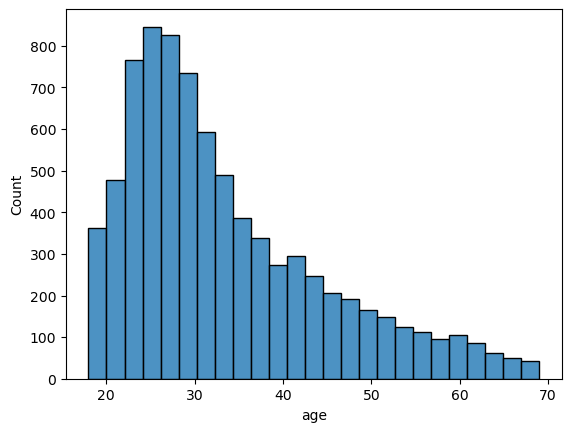

<Figure size 640x480 with 0 Axes>

In [63]:

sns.histplot(data = perfect_df, x='age', bins=25, alpha=0.8)
plt.show()
plt.clf()


# Exploring and Categorising  Body Type

categories are set as:

thin = 'thin', 'skinny', 'used up'

average = 'average'

athletic = 'athletic', 'jacked', 'fit'

overweight = 'curvy', 'extra', 'full', 'overweight'

body_type
average           2200
fit               1688
athletic          1531
curvy              739
thin               659
                  ... 
full figured       181
overweight          97
jacked              64
used up             63
rather not say      22
Name: count, Length: 12, dtype: int64
body_type
athletic          3283
average           2200
overweight        1566
thin               949
rather not say      22
Name: count, dtype: int64


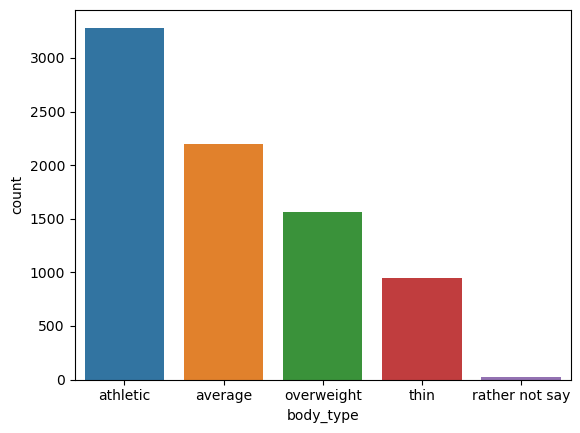

<Figure size 640x480 with 0 Axes>

In [64]:
print(perfect_df.body_type.value_counts())

def set_body_type_category(body_type_input):
    set_thin = ['thin', 'skinny', 'used up']
    set_average = ['average']
    set_athletic = ['athletic', 'jacked', 'fit']
    set_overweight = ['curvy', 'extra', 'full', 'overweight']
    
    body_type_input = body_type_input.lower()
    body_type_input = ''.join(char for char in body_type_input if char not in string.punctuation)
    
    if any(keyword in body_type_input for keyword in set_thin):
        return 'thin'
    elif any(keyword in body_type_input for keyword in set_average):
        return 'average'
    elif any(keyword in body_type_input for keyword in set_athletic):
        return 'athletic'
    elif any(keyword in body_type_input for keyword in set_overweight):
        return 'overweight'
    else:
        return body_type_input
    
perfect_df['body_type'] = perfect_df['body_type'].apply(set_body_type_category)

print(perfect_df.body_type.value_counts())
order = perfect_df['body_type'].value_counts().index

sns.countplot(data = perfect_df, x='body_type', order=order)
plt.show()
plt.clf()

# Exploring and Categorising Diet

categories are set as:

anything = 'anything'

vegetarian = 'vegetarian'

vegan = 'vegan'

kosher = 'kosher'

halal = 'halal'

other = 'other'

diet
mostly anything      4044
anything             1127
strictly anything    1061
mostly vegetarian     806
mostly other          264
                     ... 
vegan                  30
mostly halal           15
strictly kosher         6
strictly halal          4
kosher                  2
Name: count, Length: 17, dtype: int64
diet
anything      6232
vegetarian    1125
other          448
vegan          158
kosher          38
halal           19
Name: count, dtype: int64


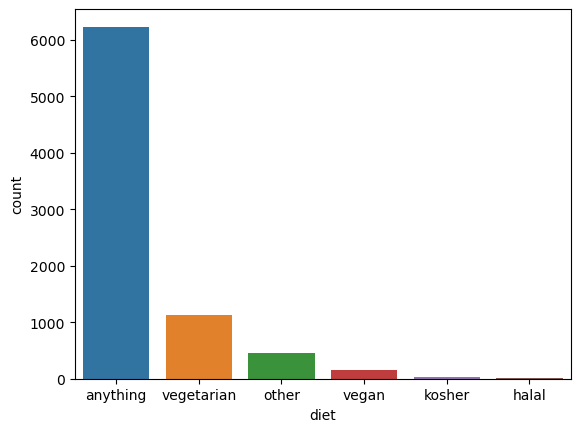

<Figure size 640x480 with 0 Axes>

In [65]:
print(perfect_df.diet.value_counts())

def set_diet_category(diet_input):
    set_anything = ['anything']
    set_vegetarian = ['vegetarian']
    set_vegan = ['vegan']
    set_kosher = ['kosher']
    set_halal = ['halal']
    set_other = ['other']
    
    
    diet_input = diet_input.lower()
    diet_input = ''.join(char for char in diet_input if char not in string.punctuation)
    
    if any(keyword in diet_input for keyword in set_anything):
        return 'anything'
    elif any(keyword in diet_input for keyword in set_vegetarian):
        return 'vegetarian'
    elif any(keyword in diet_input for keyword in set_vegan):
        return 'vegan'
    elif any(keyword in diet_input for keyword in set_kosher):
        return 'kosher'
    elif any(keyword in diet_input for keyword in set_halal):
        return 'halal'
    elif any(keyword in diet_input for keyword in set_other):
        return 'other'
    else:
        return diet_input
    
perfect_df['diet'] = perfect_df['diet'].apply(set_diet_category)

print(perfect_df.diet.value_counts())
order = perfect_df['diet'].value_counts().index

sns.countplot(data = perfect_df, x='diet', order=order)
plt.show()
plt.clf()

# Exploring Drinks

drinks
socially       5481
rarely         1006
often           718
not at all      650
very often      104
desperately      61
Name: count, dtype: int64


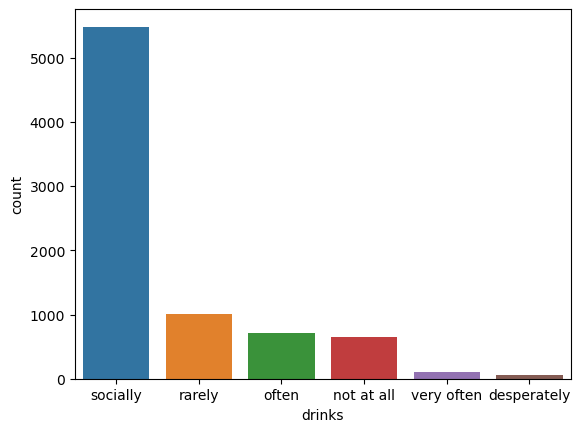

<Figure size 640x480 with 0 Axes>

In [66]:
print(perfect_df.drinks.value_counts())

order = perfect_df['drinks'].value_counts().index

sns.countplot(data = perfect_df, x='drinks', order=order)
plt.show()
plt.clf()

# Exploring Drugs

drugs
never        6390
sometimes    1524
often         106
Name: count, dtype: int64


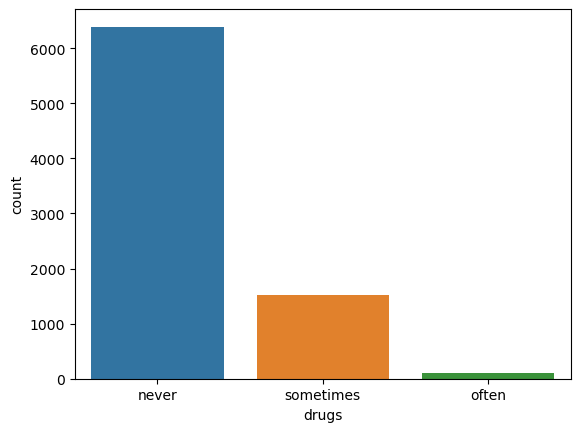

<Figure size 640x480 with 0 Axes>

In [67]:
print(perfect_df.drugs.value_counts())

order = perfect_df['drugs'].value_counts().index

sns.countplot(data = perfect_df, x='drugs', order=order)
plt.show()
plt.clf()

# Exploring and Categorising Education

categories are set as:

postgrad = 'masters ', 'law', 'med', 'space', 'phd', 'postgrad'

college = 'college', 'university'

high_school = 'high'

education
college        5136
postgrad       2522
high school     362
Name: count, dtype: int64


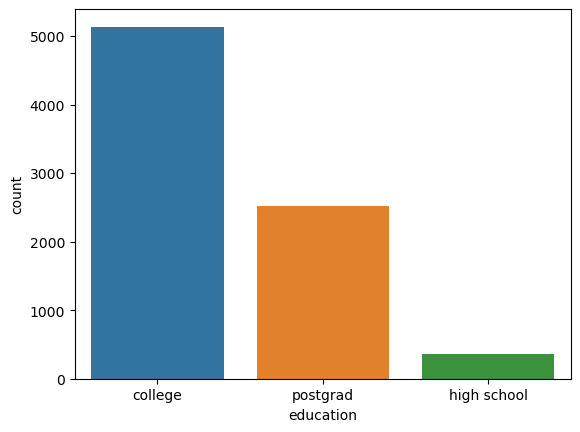

<Figure size 640x480 with 0 Axes>

In [68]:
#print(perfect_df.education.value_counts())

def set_education_category(education_input):
    set_postgrad = ['masters ', 'law', 'med', 'space', 'phd', 'postgrad']
    set_college = ['college', 'university']
    set_high_school = ['high']
    
    education_input = education_input.lower()
    education_input = ''.join(char for char in education_input if char not in string.punctuation)
    
    if any(keyword in education_input for keyword in set_postgrad):
        return 'postgrad'
    elif any(keyword in education_input for keyword in set_college):
        return 'college'
    elif any(keyword in education_input for keyword in set_high_school):
        return 'high school'
    else:
        return education_input
    
perfect_df['education'] = perfect_df['education'].apply(set_education_category)

print(perfect_df.education.value_counts())
order = perfect_df['education'].value_counts().index

sns.countplot(data = perfect_df, x='education', order=order)
plt.show()
plt.clf()


# Exploring Height

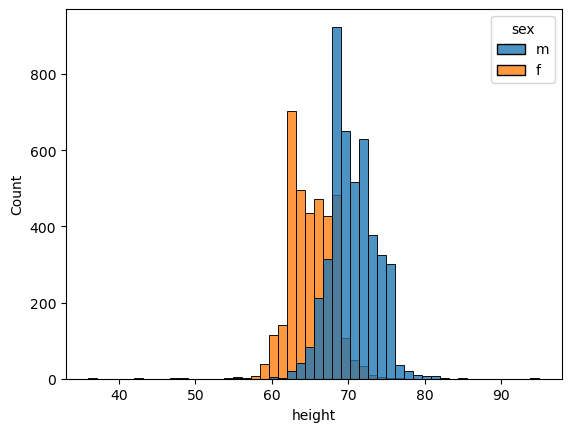

<Figure size 640x480 with 0 Axes>

In [69]:
sns.histplot(data = perfect_df, x='height', hue='sex', bins=50, alpha=0.8)
plt.show()
plt.clf()


# Exploring Jobs

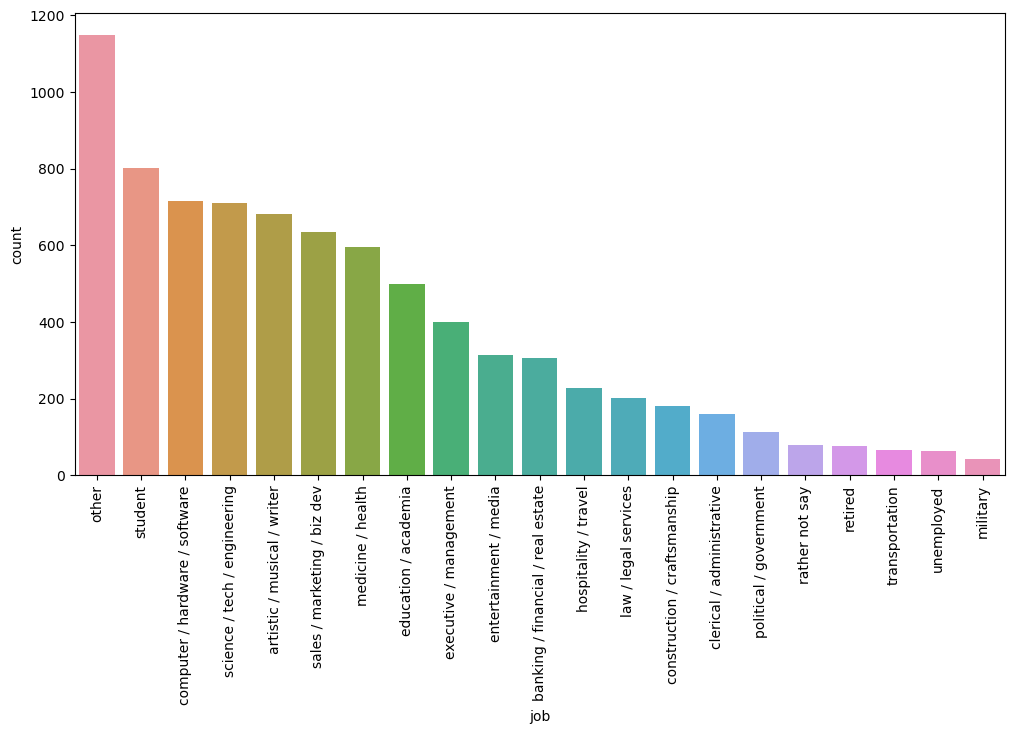

<Figure size 640x480 with 0 Axes>

In [70]:
#print(perfect_df.job.value_counts())

order = perfect_df['job'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(data = perfect_df, x='job', order=order)
plt.xticks(rotation=90)
plt.show()
plt.clf()

# Off Spring

use column 'offspring' to create new column 'has_offspring'

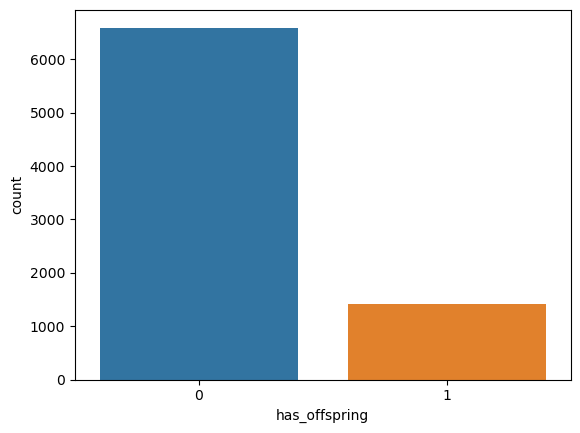

<Figure size 640x480 with 0 Axes>

In [71]:
#print(perfect_df.offspring.value_counts())

perfect_df['has_offspring'] = perfect_df['offspring'].str.contains('kid') & perfect_df['offspring'].str.contains('has')
perfect_df['has_offspring'] = perfect_df['has_offspring'].astype(int)
#print(perfect_df.has_offspring.value_counts())

sns.countplot(data = perfect_df, x='has_offspring')
plt.show()
plt.clf()



# Exploring Orientation

orientation
straight    7073
gay          498
bisexual     449
Name: count, dtype: int64


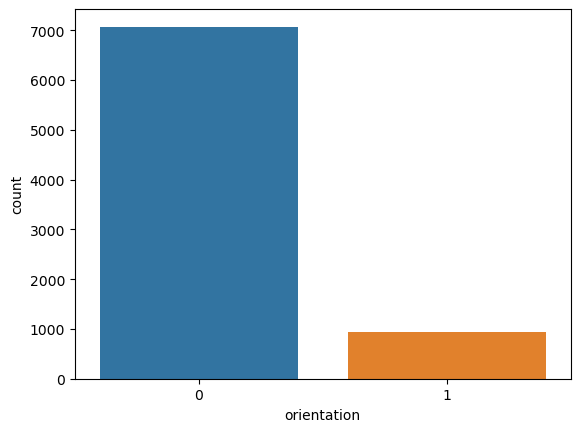

<Figure size 640x480 with 0 Axes>

In [72]:
print(perfect_df.orientation.value_counts())

perfect_df['orientation'] = perfect_df['orientation'].replace({'straight': 0, 'gay': 1, 'bisexual': 1})

sns.countplot(data = perfect_df, x='orientation')
plt.show()
plt.clf()

# Exploring Pets

use column 'pets' to make new column 'has_pets'

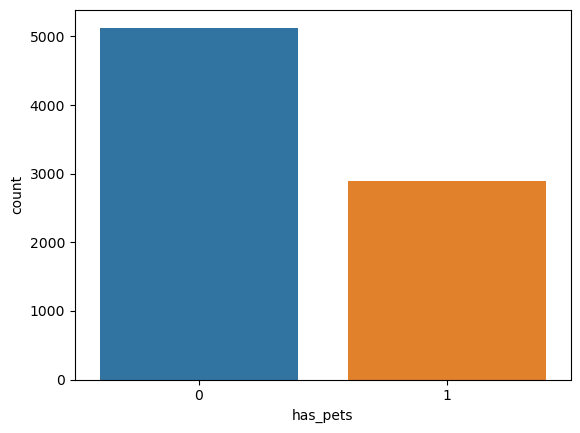

<Figure size 640x480 with 0 Axes>

In [73]:
#print(perfect_df.pets.value_counts())

perfect_df['has_pets'] = perfect_df['pets'].str.contains('has')
perfect_df['has_pets'] = perfect_df['has_pets'].astype(int)

#print(perfect_df.has_pets.value_counts())

sns.countplot(data = perfect_df, x='has_pets')
plt.show()
plt.clf()

# Exploring Religion

agnostic = 'agnostic', 'agnosticism'

atheism = 'atheist', 'atheism'

other = 'other'

christian = 'christianity', 'christian', 'catholicism', 'catholic'

jewish = 'judaism'

buddhist = 'buddhism'

hindu = 'hinduism'

muslim = 'islam'

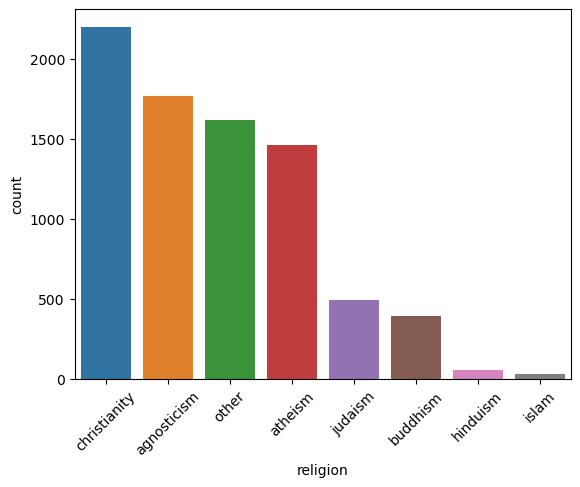

<Figure size 640x480 with 0 Axes>

In [74]:
#print(perfect_df.religion.value_counts())

def set_religion_category(religion_input):
    set_agnostic = ['agnostic', 'agnosticism']
    set_atheism = ['atheist', 'atheism']
    set_other = ['other']
    set_christian = ['christianity', 'christian', 'catholicism', 'catholic']
    set_jewish = ['judaism']
    set_buddhist = ['buddhism']
    set_hindu = ['hinduism']
    set_muslim = ['islam']
    
    religion_input = religion_input.lower()
    religion_input = ''.join(char for char in religion_input if char not in string.punctuation)
    
    if any(keyword in religion_input for keyword in set_agnostic):
        return 'agnosticism'
    elif any(keyword in religion_input for keyword in set_atheism):
        return 'atheism'
    elif any(keyword in religion_input for keyword in set_other):
        return 'other'
    elif any(keyword in religion_input for keyword in set_christian):
        return 'christianity'
    elif any(keyword in religion_input for keyword in set_jewish):
        return 'judaism'
    elif any(keyword in religion_input for keyword in set_buddhist):
        return 'buddhism'
    elif any(keyword in religion_input for keyword in set_hindu):
        return 'hinduism'
    elif any(keyword in religion_input for keyword in set_muslim):
        return 'islam'
    else:
        return religion_input
    
perfect_df['religion'] = perfect_df['religion'].apply(set_religion_category)

#print(perfect_df.religion.value_counts())

order = perfect_df['religion'].value_counts().index

sns.countplot(data = perfect_df, x='religion', order=order)
plt.xticks(rotation=45)
plt.show()
plt.clf()

# Exploring Sex

1 is male

0 is female

sex
m    4488
f    3532
Name: count, dtype: int64


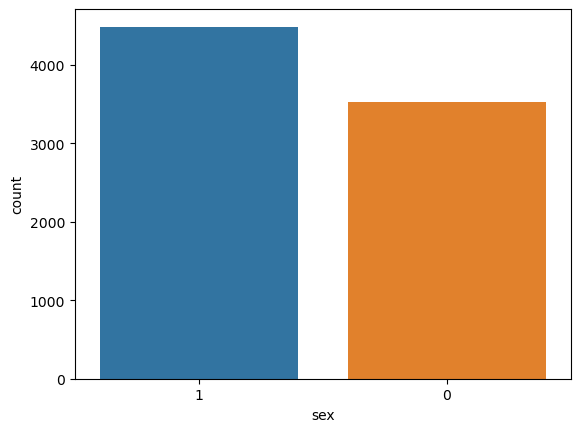

<Figure size 640x480 with 0 Axes>

In [75]:
print(perfect_df.sex.value_counts())

perfect_df['sex'] = perfect_df['sex'].replace({'f': 0, 'm': 1})
order = perfect_df['sex'].value_counts().index

sns.countplot(data = perfect_df, x='sex', order=order)
plt.show()
plt.clf()

# Exploring and Categorising Smokes

no = 'no'

yes = 'sometimes', 'yes', 'when drinking', 'trying to quit'

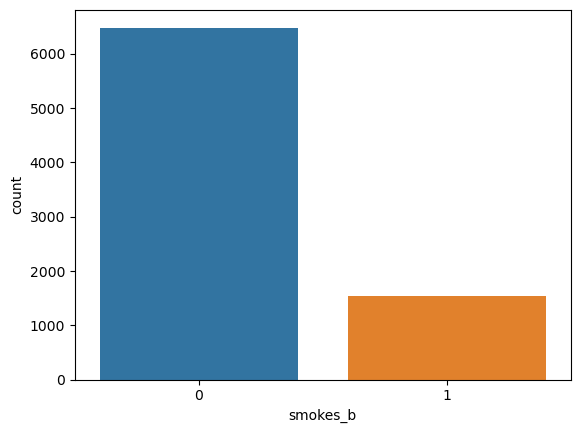

<Figure size 640x480 with 0 Axes>

In [76]:
#print(perfect_df.smokes.value_counts())

def set_smokes_category(smokes_input):
    set_no = ['no']
    set_yes = ['sometimes', 'yes', 'when drinking', 'trying to quit']
        
    smokes_input = smokes_input.lower()
    smokes_input = ''.join(char for char in smokes_input if char not in string.punctuation)
    
    if any(keyword in smokes_input for keyword in set_no):
        return 'no'
    elif any(keyword in smokes_input for keyword in set_yes):
        return 'yes'
    else:
        return smokes_input
    
perfect_df['smokes'] = perfect_df['smokes'].apply(set_smokes_category)
#print(perfect_df.smokes.value_counts())

perfect_df['smokes_b'] = perfect_df['smokes'].replace({'no': 0, 'yes': 1})

order = perfect_df['smokes_b'].value_counts().index

sns.countplot(data = perfect_df, x='smokes_b', order=order)
plt.show()
plt.clf()

# Exploring and Categorising Speaks

if a word in speaks is not in the following this then row is categorised as speaking a second language

set_english = 'english', 'fluently', 'okay', 'poorly', 'c'

second_language
1    4463
0    3557
Name: count, dtype: int64


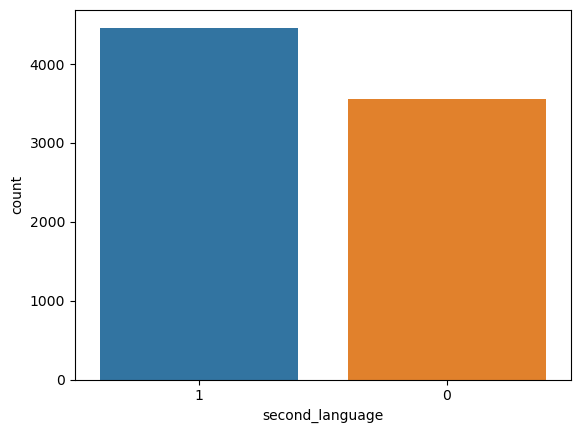

<Figure size 640x480 with 0 Axes>

In [77]:
pd.set_option('display.max_rows', 10)
#print(perfect_df.speaks.value_counts())

def set_second_language(speaks_input):
    set_english = ['english', 'fluently', 'okay', 'poorly', 'c']
        
    speaks_input = speaks_input.lower()
    speaks_input = ''.join(char for char in speaks_input if char not in string.punctuation)
    
    words_in_input = speaks_input.split()
    
    counter = 0 
    
    for word in words_in_input:
        if word not in set_english:
            counter += 1
    if counter > 0:
        #print(f'1 {speaks_input} {counter}')
        return 1
        counter = 0
    else:
        #print(f'0 {speaks_input} {counter}')
        return 0
        counter = 0
                

perfect_df['second_language'] = perfect_df['speaks'].apply(set_second_language)

print(perfect_df.second_language.value_counts())

order = perfect_df['second_language'].value_counts().index

sns.countplot(data = perfect_df, x='second_language', order=order)
plt.show()
plt.clf()

# Exploring and Categorising Status

status
single            7510
available          255
seeing someone     213
married             42
Name: count, dtype: int64
status
single          7765
relationship     255
Name: count, dtype: int64


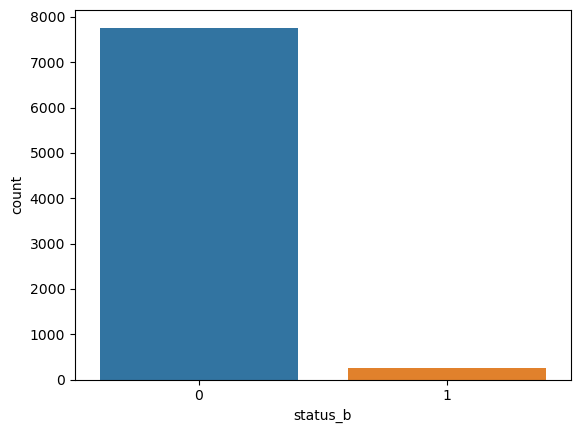

<Figure size 640x480 with 0 Axes>

In [78]:
print(perfect_df.status.value_counts())

def set_status_category(status_input):
    set_single = ['single', 'available']
    set_relationship = ['relationship', 'seeing someone', 'married']
    
    status_input = status_input.lower()
    status_input = ''.join(char for char in status_input if char not in string.punctuation)
    
    if any(keyword in status_input for keyword in set_single):
        return 'single'
    elif any(keyword in status_input for keyword in set_relationship):
        return 'relationship'
    else:
        return status_input
    
perfect_df['status'] = perfect_df['status'].apply(set_status_category)
print(perfect_df.status.value_counts())


perfect_df['status_b'] = perfect_df['status'].replace({'single': 0, 'relationship': 1})
order = perfect_df['status_b'].value_counts().index

sns.countplot(data = perfect_df, x='status_b', order=order)
plt.show()
plt.clf()

# Preparing Data for modelling

Binary: has_offspring, orientation, has_pets, sex, smokes_b, second_language, status_b
Categorical: body_type, diet, drinks, drugs, education, job, religion
Continuous: age, height

scaling continuous data
creating dummy variables from categorical data

In [79]:
continuous_columns = ['age', 'height']
continuous_data = perfect_df[continuous_columns]

scaler = MinMaxScaler()
scaled_continuous_data = scaler.fit_transform(continuous_data)
perfect_df[continuous_columns] = scaled_continuous_data

selected_columns = ['has_offspring', 'orientation', 'has_pets', 'sex', 'smokes_b', 'second_language', 'status_b', 'age', 'height']

perfect_data_df = perfect_df[selected_columns]

for_dummies = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'religion']
df_for_dummies = perfect_df[for_dummies]
df_dummies = pd.get_dummies(df_for_dummies, columns=['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'religion'])

combined_df = pd.concat([perfect_data_df, df_dummies], axis=1)

#print(combined_df.info())
#combined_df.head()

# Logistic Regression

Train Accuracy: 0.87
Test Accuracy: 0.86
Confusion Matrix:
            predicted yes  predicted no
actual yes            516           606
actual no             221          5073
Confusion Matrix:
            predicted yes  predicted no
actual yes            132           170
actual no              59          1243
                             Feature  Coefficient  Absolute Coefficient
6                                age     6.619808              6.619808
46                       job_retired    -1.045491              1.045491
35  job_construction / craftsmanship     1.005383              1.005383
7                             height     0.991110              0.991110
5                           status_b     0.857264              0.857264
..                               ...          ...                   ...
23                   drinks_socially     0.044833              0.044833
27                   drugs_sometimes     0.026519              0.026519
36          job_education / academi

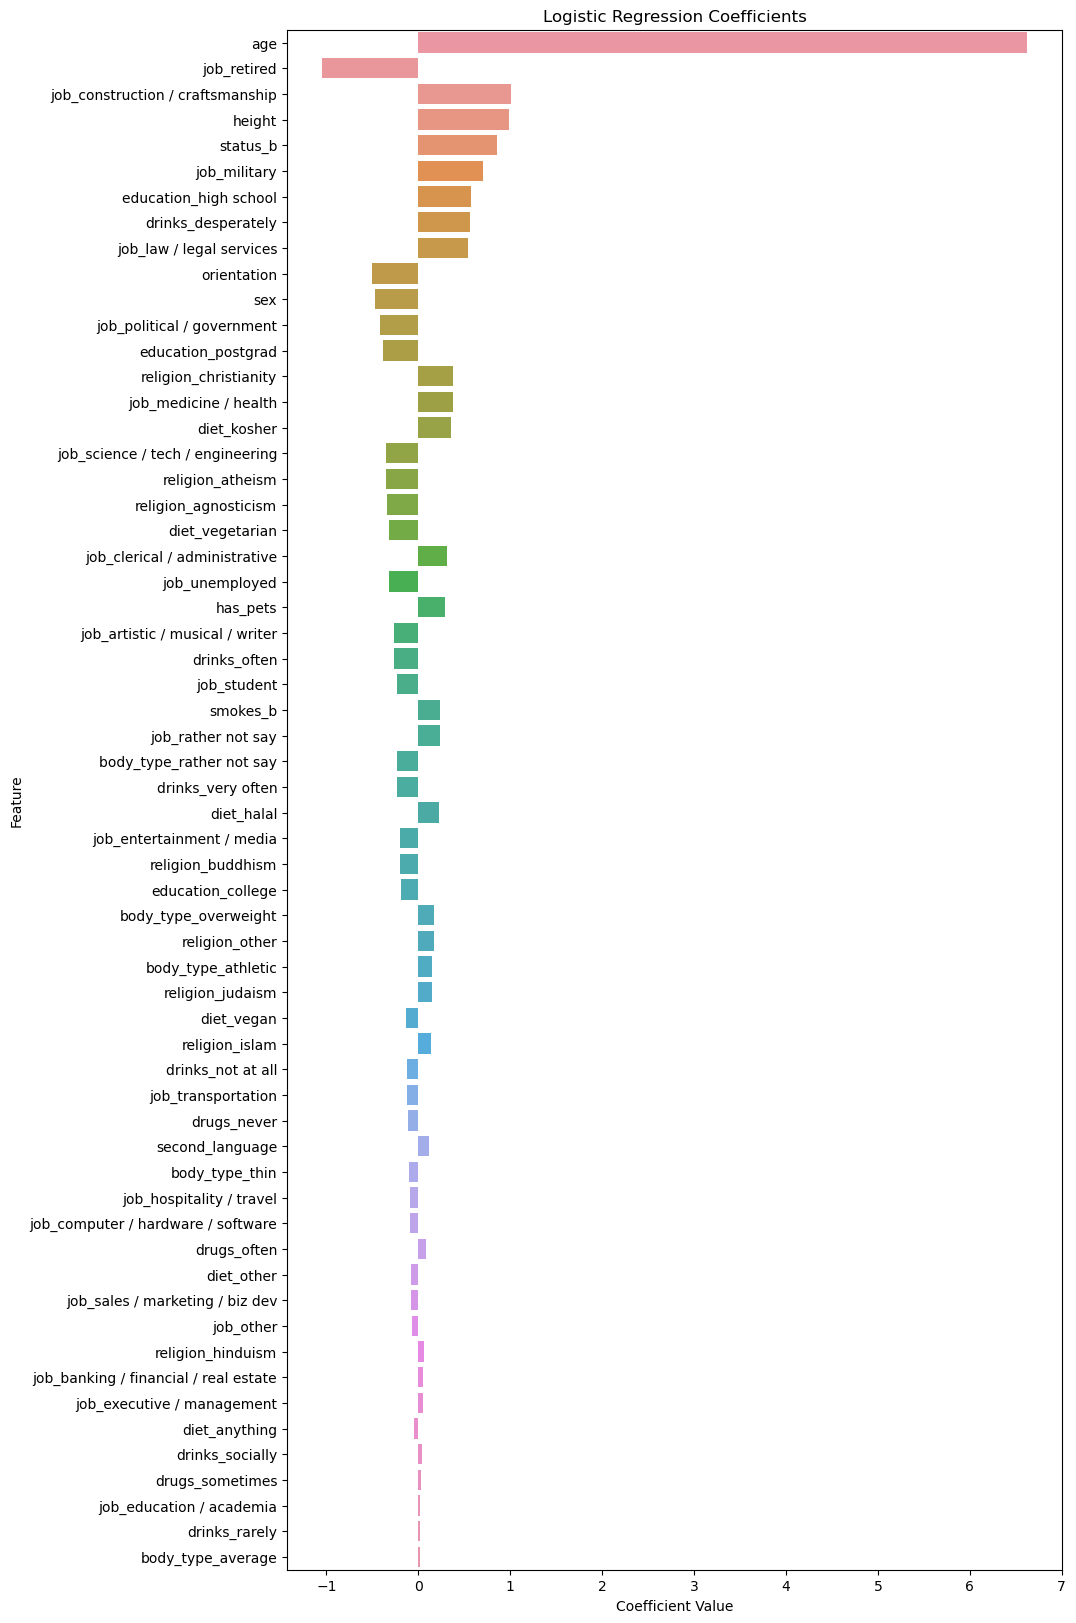

<Figure size 640x480 with 0 Axes>

In [80]:
y = combined_df['has_offspring']
X = combined_df.drop('has_offspring', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

train_conf_matrix = pd.DataFrame(
  confusion_matrix(y_train, y_train_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

test_conf_matrix = pd.DataFrame(
  confusion_matrix(y_test, y_test_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

print(f'Confusion Matrix:\n{train_conf_matrix.to_string()}')
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')


coefficients = lr_model.coef_[0]
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coefficients_df)

plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.barplot(x="Coefficient", y="Feature", data=coefficients_df, orient="h")
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')

plt.show()
plt.clf()


# Random Forest Classifier

Train Accuracy: 1.00
Test Accuracy: 0.85
Confusion Matrix:
            predicted yes  predicted no
actual yes           1122             0
actual no               0          5294
Confusion Matrix:
            predicted yes  predicted no
actual yes            121           181
actual no              64          1238
                     Feature  Importance
6                        age    0.352491
7                     height    0.097953
4            second_language    0.024921
1                   has_pets    0.023704
8         body_type_athletic    0.019421
..                       ...         ...
26               drugs_often    0.000932
57            religion_islam    0.000730
15               diet_kosher    0.000730
11  body_type_rather not say    0.000717
14                diet_halal    0.000663

[60 rows x 2 columns]


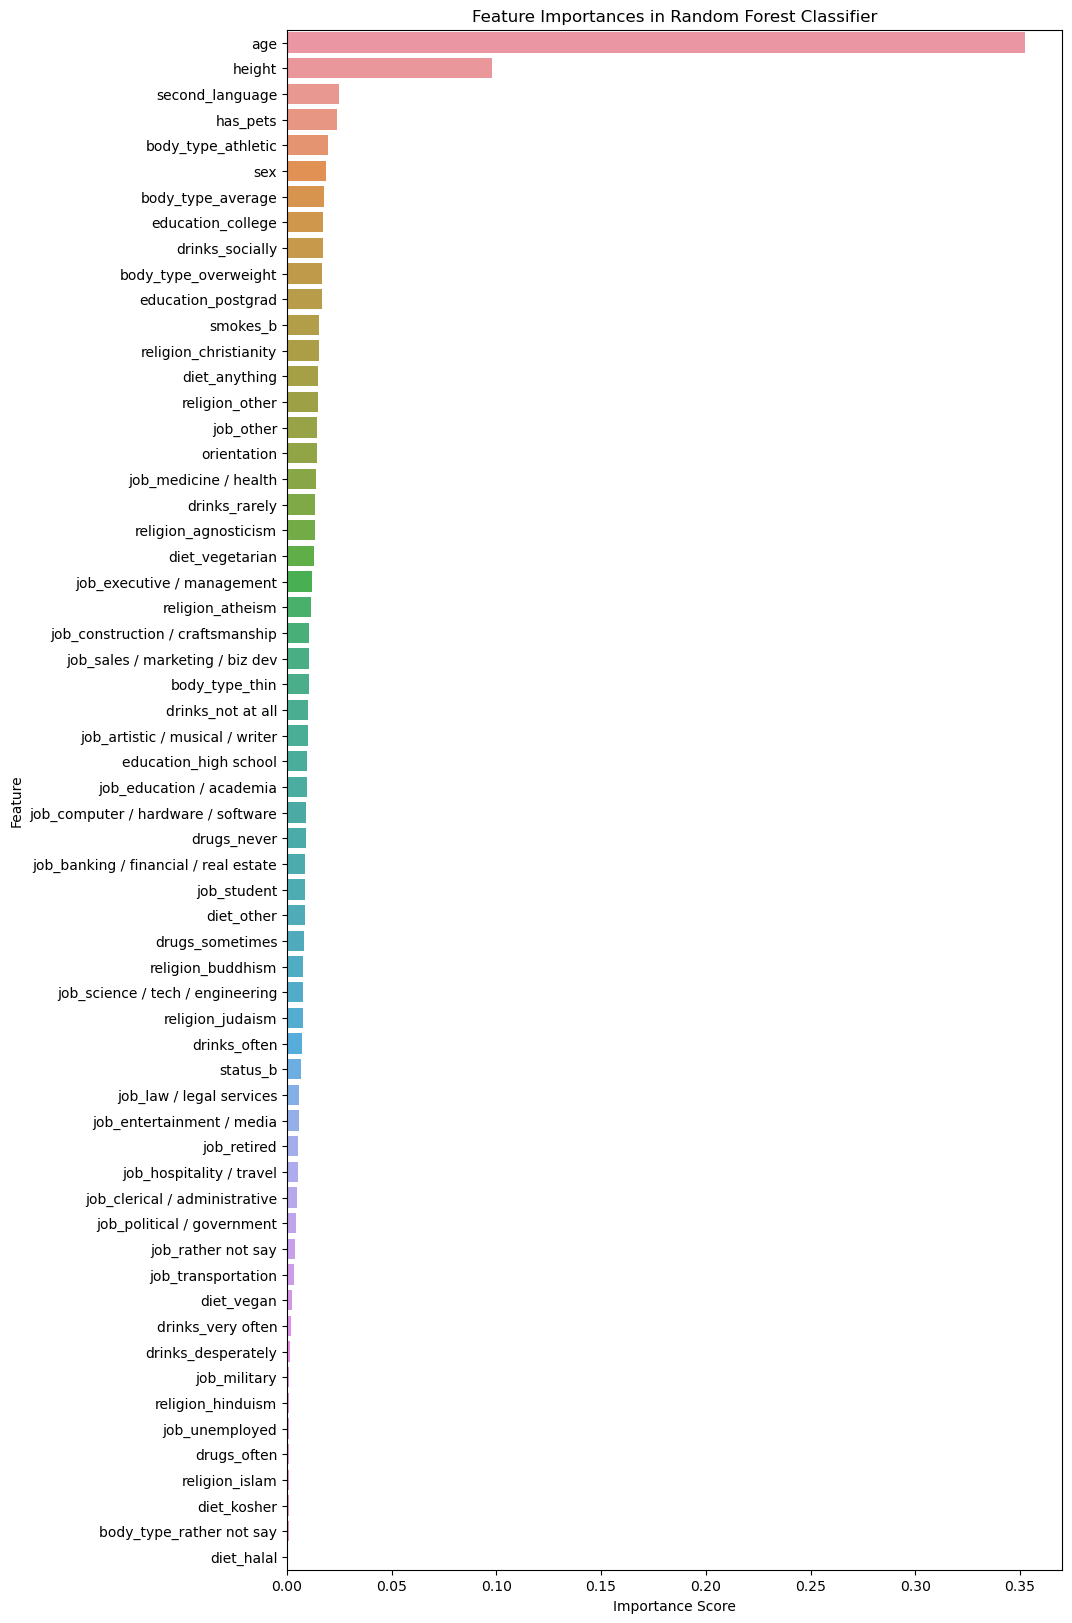

<Figure size 640x480 with 0 Axes>

In [81]:
y = combined_df['has_offspring']
X = combined_df.drop('has_offspring', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

train_conf_matrix = pd.DataFrame(
  confusion_matrix(y_train, y_train_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

test_conf_matrix = pd.DataFrame(
  confusion_matrix(y_test, y_test_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

print(f'Confusion Matrix:\n{train_conf_matrix.to_string()}')
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')



feature_importances = rf_classifier.feature_importances_


importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)

plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.barplot(x="Importance", y="Feature", data=importance_df, orient="h")
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Classifier')

plt.show()
plt.clf()

# Gradient Boosting Classifier

Train Accuracy: 0.87
Test Accuracy: 0.85
Confusion Matrix:
            predicted yes  predicted no
actual yes            550           572
actual no             254          5040
Confusion Matrix:
            predicted yes  predicted no
actual yes            130           172
actual no              65          1237


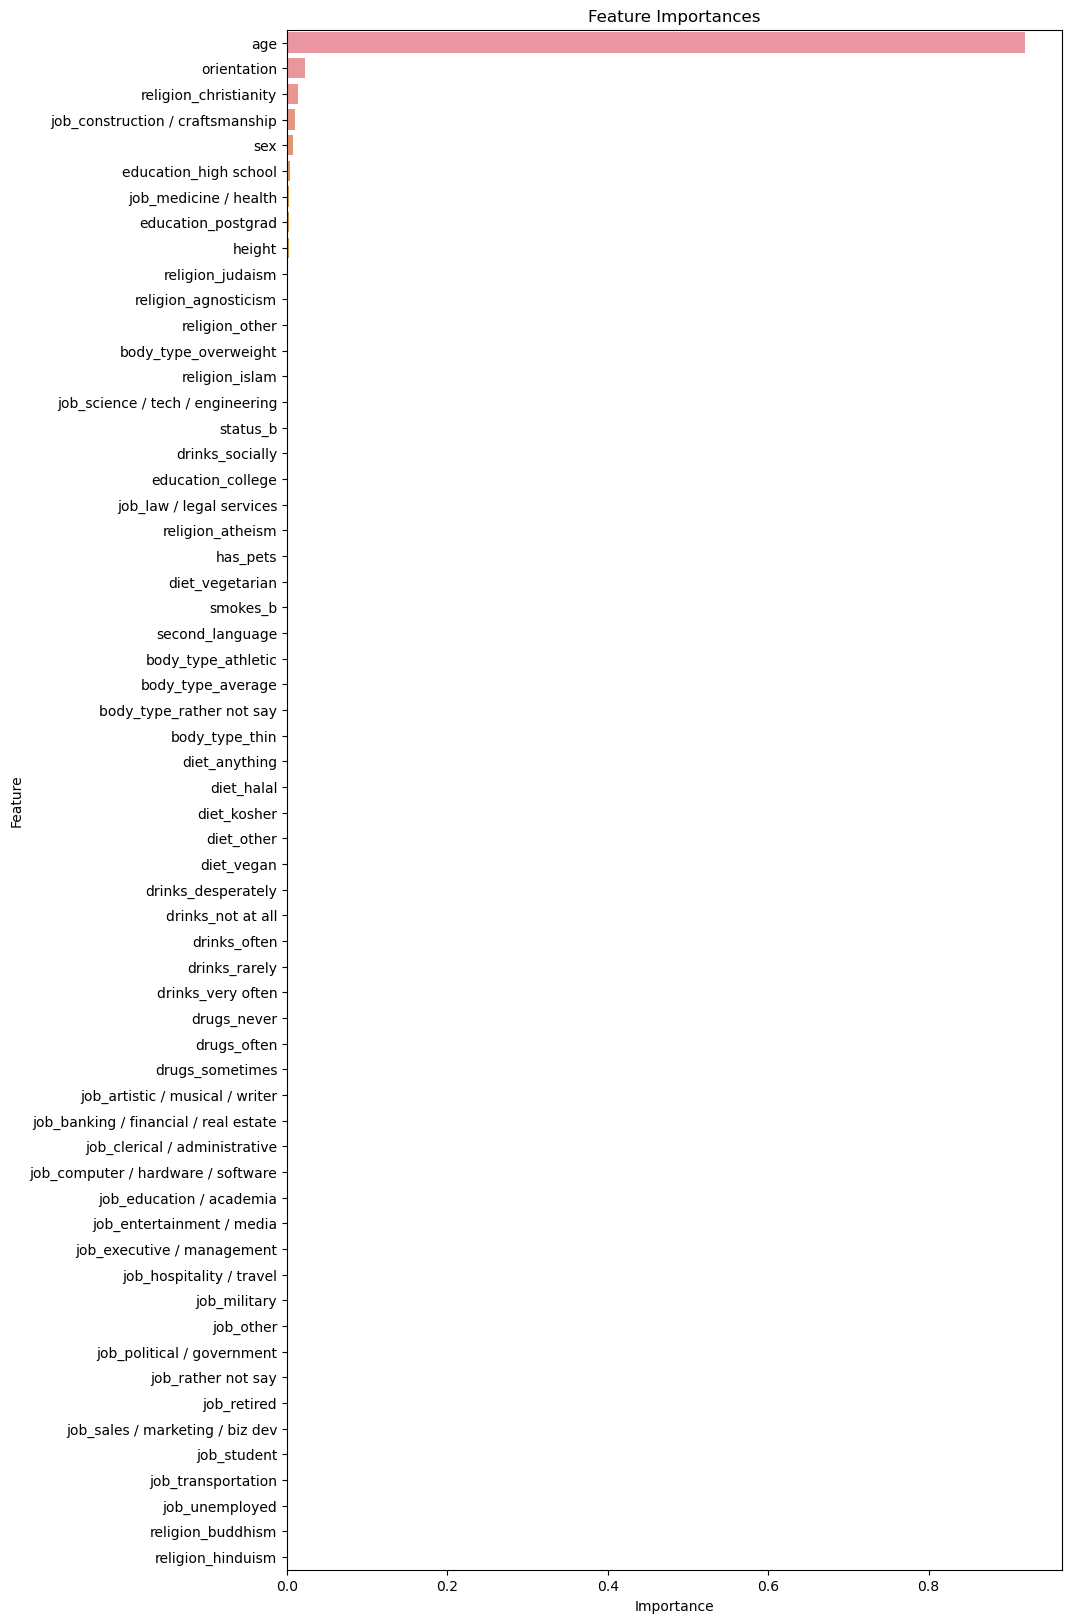

In [82]:
y = combined_df['has_offspring']
X = combined_df.drop('has_offspring', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

grad_classifier = GradientBoostingClassifier(n_estimators=15)

grad_classifier.fit(X_train, y_train)

y_train_pred = grad_classifier.predict(X_train)
y_test_pred = grad_classifier.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

train_conf_matrix = pd.DataFrame(
  confusion_matrix(y_train, y_train_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

test_conf_matrix = pd.DataFrame(
  confusion_matrix(y_test, y_test_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

print(f'Confusion Matrix:\n{train_conf_matrix.to_string()}')
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')



feature_importances = grad_classifier.feature_importances_


importance_dict = dict(zip(X_train.columns, feature_importances))


sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)


importance_df = pd.DataFrame(sorted_importances, columns=['Feature', 'Importance'])


plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df, orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# K Nearest Neighbors

In [83]:
n_neighbors_values = range(1, 100)


best_n_neighbors = None
best_f1 = 0.0


for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_n_neighbors = n_neighbors

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best f1: {best_f1:.4f}")


Best n_neighbors: 1
Best f1: 0.3762


the best n_neighbors found was 1, suggesting KNN is not a good model option for my data

In [84]:
y = combined_df['has_offspring']
X = combined_df.drop('has_offspring', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

train_conf_matrix = pd.DataFrame(
  confusion_matrix(y_train, y_train_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

test_conf_matrix = pd.DataFrame(
  confusion_matrix(y_test, y_test_pred, labels=[1, 0]), 
  index=['actual yes', 'actual no'], 
  columns=['predicted yes', 'predicted no']
)

print(f'Confusion Matrix:\n{train_conf_matrix.to_string()}')
print(f'Confusion Matrix:\n{test_conf_matrix.to_string()}')



Train Accuracy: 0.87
Test Accuracy: 0.81
Confusion Matrix:
            predicted yes  predicted no
actual yes            402           720
actual no             115          5179
Confusion Matrix:
            predicted yes  predicted no
actual yes             67           235
actual no              63          1239


In [85]:
print(X.columns)

input_data = ['0', '0', '1', '0', '0', '1', '24', '71', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0',
 '0', '0','0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
 '0', '0', '0','0', '0']

input_data = np.array(input_data, dtype=float)

selected_columns = input_data[6:8]

selected_columns = selected_columns.reshape(1, -1)

scaled_input_data = scaler.transform(selected_columns)

input_data[6:8] = scaled_input_data

input_data = input_data.reshape(1, -1)

Index(['orientation', 'has_pets', 'sex', 'smokes_b', 'second_language',
       'status_b', 'age', 'height', 'body_type_athletic', 'body_type_average',
       'body_type_overweight', 'body_type_rather not say', 'body_type_thin',
       'diet_anything', 'diet_halal', 'diet_kosher', 'diet_other',
       'diet_vegan', 'diet_vegetarian', 'drinks_desperately',
       'drinks_not at all', 'drinks_often', 'drinks_rarely', 'drinks_socially',
       'drinks_very often', 'drugs_never', 'drugs_often', 'drugs_sometimes',
       'education_college', 'education_high school', 'education_postgrad',
       'job_artistic / musical / writer',
       'job_banking / financial / real estate',
       'job_clerical / administrative', 'job_computer / hardware / software',
       'job_construction / craftsmanship', 'job_education / academia',
       'job_entertainment / media', 'job_executive / management',
       'job_hospitality / travel', 'job_law / legal services',
       'job_medicine / health', 'job_milita

C:\Users\Noah\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [86]:

probability = lr_model.predict_proba(input_data)
probability_of_has_offspring = probability[0][1]
print(f"Logistic Regression: Probability of having offspring: {probability_of_has_offspring:.4f}")

probability = knn_classifier.predict_proba(input_data)
probability_of_has_offspring = probability[0][1]
print(f"K Nearest Neighbors: Probability of having offspring: {probability_of_has_offspring:.4f}")

probability_rf = rf_classifier.predict_proba(input_data)
probability_of_has_offspring_rf = probability_rf[0][1]
print(f"Random Forest: Probability of having offspring (Random Forest): {probability_of_has_offspring_rf:.4f}")

probability_gb = grad_classifier.predict_proba(input_data)
probability_of_has_offspring_gb = probability_gb[0][1]
print(f"Gradient Boosting Classifier: Probability of having offspring (Gradient Boosting): {probability_of_has_offspring_gb:.4f}")


Logistic Regression: Probability of having offspring: 0.0245
K Nearest Neighbors: Probability of having offspring: 0.2000
Random Forest: Probability of having offspring (Random Forest): 0.1000
Gradient Boosting Classifier: Probability of having offspring (Gradient Boosting): 0.0578


C:\Users\Noah\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Noah\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
